# **Bibliotecas e Diretórios**

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.backend import var
import pickle as pk
from keras.datasets import cifar10
from keras.datasets import mnist
from skimage.util import random_noise
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from keras.datasets import mnist

drive.mount('/content/gdrive')

_GAUSS_NOISE   = [0.1, 0.2, 0.3]
_NOISE_FOLDER = '/content/gdrive/MyDrive/IC/Datasets/'
_LOW_SAMPLE = 100

# Cria uma repositório caso não tenha
if not os.path.exists(_NOISE_FOLDER):
  print('Nonexistent!')
  os.makedirs(_NOISE_FOLDER)
else:
  print('Existent!')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Existent!



# **Aplicação do ruído no dataset CIFAR 10**

In [ ]:
def lowSampleDataset(X, Y):
    perm = np.random.permutation(X.shape[0])
    X = X[perm[0 : (int)(X.shape[0] * (_LOW_SAMPLE/50))]]
    Y = Y[perm[0 : (int)(Y.shape[0] * (_LOW_SAMPLE/50))]]
    return X, Y

# Dimensão da imagem
def examples(x_train_noisy):

  np.save('Imagem.np', x_train_noisy[0])
  plt.figure(figsize=(5, 5))

  # Número de imagens a serem pintadas
  n = 1

  # Resultado
  for i in range(n):
      ax = plt.subplot(1, n, i+1)
      plt.imshow(x_train_noisy[i])
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()

In [ ]:
(Xtrain, _), (Xtest, _) = cifar10.load_data()

Ytrain = Xtrain
Ytest = Xtest

Xtrain, Ytrain = lowSampleDataset(Xtrain, Ytrain)
Xtest, Ytest = lowSampleDataset(Xtest, Ytest)

# Dimensões da imagens
print("Data train shape: ", Xtrain.shape)
print("Label train shape: ", Ytrain.shape)
print("Data test shape: ", Xtest.shape)
print("Label test shape: ", Ytest.shape)

Data train shape:  (50000, 32, 32, 3)
Label train shape:  (50000, 32, 32, 3)
Data test shape:  (10000, 32, 32, 3)
Label test shape:  (10000, 32, 32, 3)


Done, noisy 0.100000!


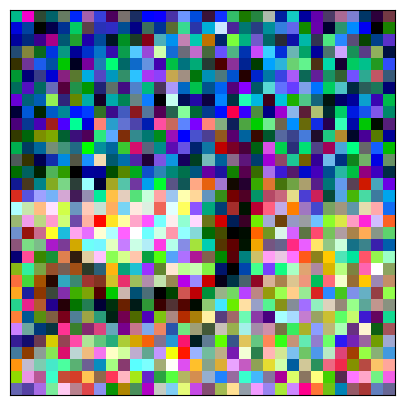

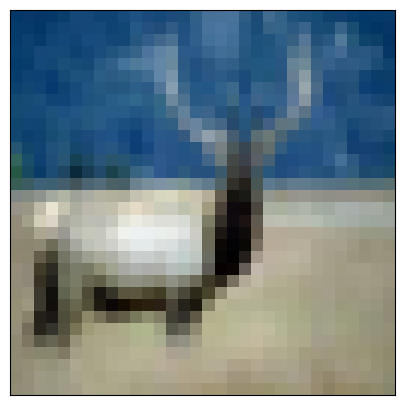

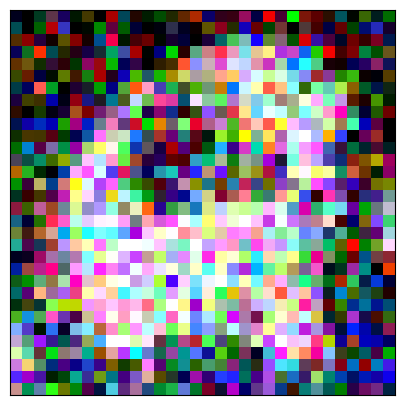

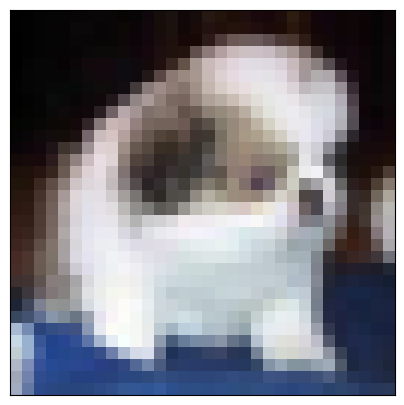

Done, noisy 0.200000!


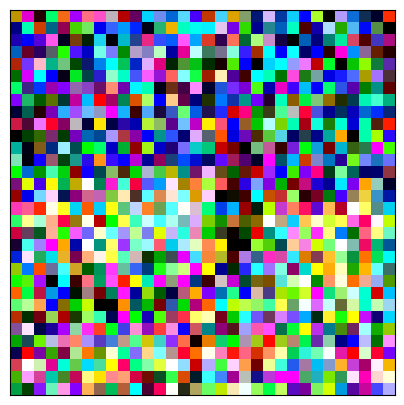

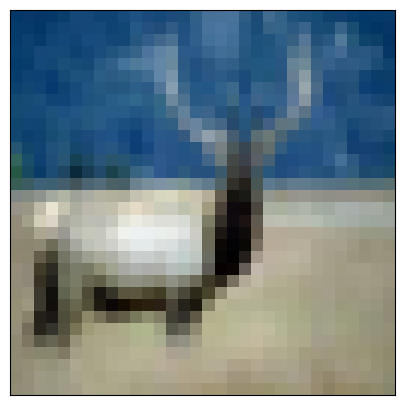

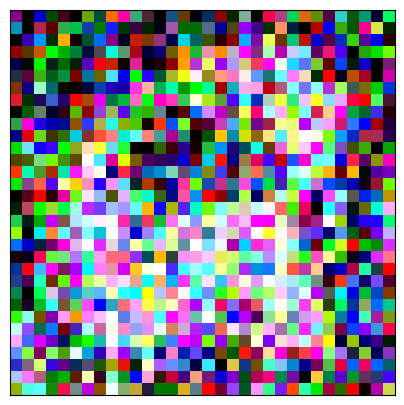

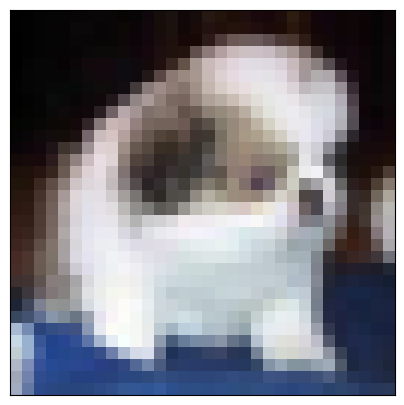

Done, noisy 0.300000!


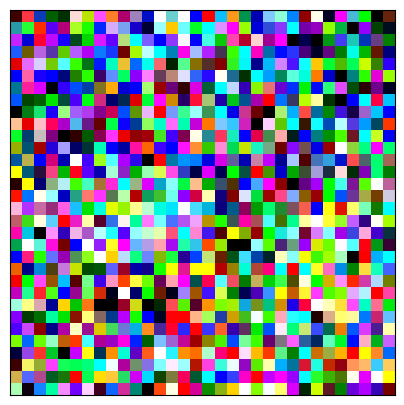

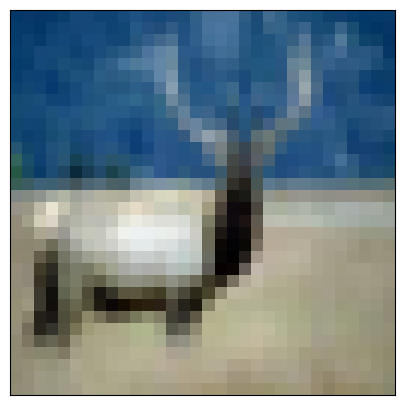

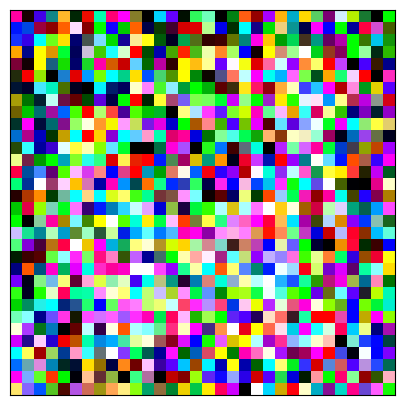

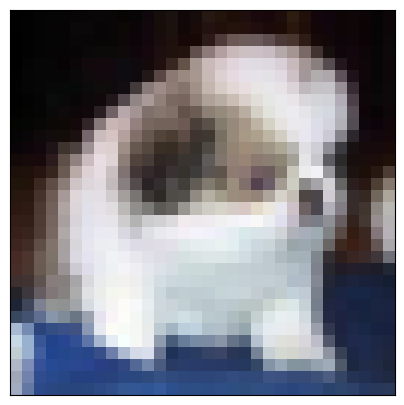

In [ ]:
# Aplicação do ruído gaussiano
Ytrain = Xtrain
Ytest = Xtest

for i in range(len(_GAUSS_NOISE)):
  Xtrain = random_noise(Xtrain, mode='gaussian', seed=None, clip=True, var=_GAUSS_NOISE[i])
  Xtest  = random_noise(Xtest , mode='gaussian', seed=None, clip=True, var=_GAUSS_NOISE[i])

  print('Done, noisy %f!' %(_GAUSS_NOISE[i]))

  examples(Xtrain)
  examples(Ytrain)

  examples(Xtest)
  examples(Ytest)

  np.save(_NOISE_FOLDER + 'cifar10_Xtrain_' + str(int(_GAUSS_NOISE[i] * 100)) + '_' + str(_LOW_SAMPLE) + '.npy', Xtrain)
  np.save(_NOISE_FOLDER + 'cifar10_Xtest_' + str(int(_GAUSS_NOISE[i]* 100))  + '_' + str(_LOW_SAMPLE) + '.npy', Xtest)
  np.save(_NOISE_FOLDER + 'cifar10_Ytrain_' + str(int(_GAUSS_NOISE[i]* 100)) + '_' + str(_LOW_SAMPLE) + '.npy', Ytrain)
  np.save(_NOISE_FOLDER + 'cifar10_Ytest_' + str(int(_GAUSS_NOISE[i]* 100))  + '_' + str(_LOW_SAMPLE) + '.npy', Ytest)



# **Aplicação do ruídp no Dataset MNIST**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dimensões da imagens
print('Train: X=%s, Y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, Y=%s'  % (x_test.shape , y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


Done, noisy 0.100000!


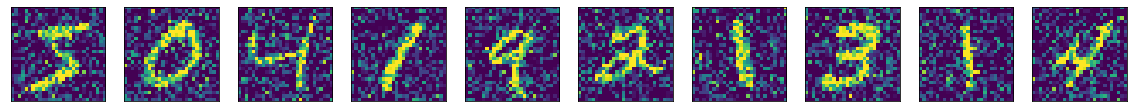

Done, noisy 0.300000!


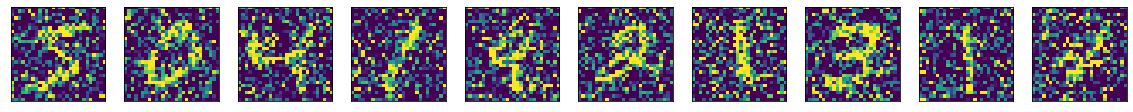

Done, noisy 0.500000!


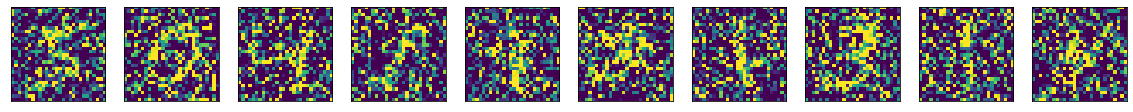

Done, noisy 0.700000!


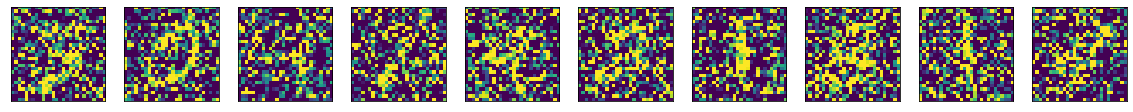

In [ ]:
# Aplicação do ruído gaussiano
for i in range(len(_GAUSS_NOISE)):
  x_train_noisy = random_noise(x_train, mode='gaussian', seed=None, clip=True, var=_GAUSS_NOISE[i])
  x_test_noisy  = random_noise(x_test , mode='gaussian', seed=None, clip=True, var=_GAUSS_NOISE[i])

  print('Done, noisy %f!' %(_GAUSS_NOISE[i]))
  examples(x_train_noisy)

  np.save(_NOISE_FOLDER + 'MNIST_Xtrain_' + str(_GAUSS_NOISE[i]) + '.npy', x_train_noisy)
  np.save(_NOISE_FOLDER + 'MNIST_Xtest_' + str(_GAUSS_NOISE[i]) + '.npy', x_test_noisy)
  np.save(_NOISE_FOLDER + 'MNIST_Ytrain_' + str(_GAUSS_NOISE[i]) + '.npy', y_train)
  np.save(_NOISE_FOLDER + 'MNIST_Ytest_' + str(_GAUSS_NOISE[i]) + '.npy', y_test)

In [ ]:
#architecture
import keras.backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D, Conv2DTranspose
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.optimizers import SGD

from keras.datasets import cifar10
from keras.datasets import cifar100

In [ ]:
(Xtrain, _), (Xtest, _) = cifar10.load_data()

Ytrain = Xtrain / 255

Xtrain = random_noise(Xtrain , mode='gaussian', seed=None, clip=True, var=0.1)

Xtrain /= 255

print(Ytrain[0][0])

[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.53333333 0.42352941]
 [0.62352941 0.50588235 0.4 

In [ ]:
m = load_model('/content/cifar10_model (3).h5')

res = m.predict(Xtrain)

print(res[0][0])

1563/1563 [==============================] - 15s 9ms/step
[[0.3103698  0.32674477 0.24886346]
 [0.3832274  0.41921538 0.35072884]
 [0.36100143 0.35680282 0.3658723 ]
 [0.3227918  0.35136604 0.2861896 ]
 [0.31495464 0.31935668 0.298445  ]
 [0.29253912 0.31589597 0.24527335]
 [0.33020538 0.32821584 0.29809043]
 [0.31550765 0.3400947  0.27032834]
 [0.3786586  0.38679433 0.352009  ]
 [0.3793729  0.40759546 0.3406907 ]
 [0.40966415 0.4146117  0.39402825]
 [0.3927626  0.42018688 0.35633713]
 [0.3992247  0.38692462 0.3818379 ]
 [0.35373008 0.3873608  0.3170137 ]
 [0.35957325 0.35341364 0.34644136]
 [0.31889147 0.3568138  0.2767468 ]
 [0.30117804 0.29648352 0.28828698]
 [0.25839955 0.287345   0.20625946]
 [0.29010934 0.2849328  0.2571599 ]
 [0.2685142  0.2951719  0.21705386]
 [0.32243747 0.31745765 0.28613597]
 [0.30852044 0.33652234 0.26290017]
 [0.33753812 0.3319757  0.31012565]
 [0.31243396 0.34069592 0.26805213]
 [0.32121813 0.31261945 0.29583567]
 [0.28534493 0.3139006  0.23832655]
 [0.30

In [ ]:
import math

def rmse(imageA, imageB):

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return math.sqrt(err)

print(rmse(res[1], Ytrain[1]))

0.27775796110975387
